In [9]:

import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity


# Download NLTK's Punkt tokenizer models (run once)
nltk.download('punkt')

import os

 # Initialize the SBERT model
model = SentenceTransformer('all-MiniLM-L12-v2')  # You can choose other models if desired
def split_into_sentences(article_text):
    """
    Splits the article into individual sentences.

    Parameters:
    - article_text (str): The text of the article.

    Returns:
    - List[str]: A list of sentences.
    """
    sentences = sent_tokenize(article_text)
    return sentences

def get_sentence_embeddings(sentences, model):
    """
    Generates embeddings for each sentence using SBERT.

    Parameters:
    - sentences (List[str]): List of sentences.
    - model (SentenceTransformer): Pre-loaded SBERT model.

    Returns:
    - np.ndarray: Array of sentence embeddings.
    """
    embeddings = model.encode(sentences)
    return embeddings

def compute_coherence_score(embeddings):
    """
    Computes the coherence score of an article based on the cosine similarity 
    between consecutive sentence embeddings.

    Parameters:
    - embeddings (np.ndarray): Array of sentence embeddings.

    Returns:
    - float: The coherence score (average cosine similarity).
    """
    if len(embeddings) < 2:
        # Not enough sentences to compute coherence
        return 0.0

    # Initialize total similarity
    total_similarity = 0.0
    num_pairs = len(embeddings) - 1

    # Iterate over consecutive sentence pairs
    for i in range(num_pairs):
        # Reshape embeddings for cosine_similarity
        emb1 = embeddings[i].reshape(1, -1)
        emb2 = embeddings[i + 1].reshape(1, -1)
        similarity = cosine_similarity(emb1, emb2)[0][0]
        total_similarity += similarity

    # Calculate average similarity
    coherence_score = total_similarity / num_pairs
    return coherence_score

def compute_article_coherence(df, article_column='article_content'):
    """
    Computes the contextual coherence score for each article in the DataFrame.

    Parameters:
    - df (pd.DataFrame): DataFrame containing articles.
    - article_column (str): The column name that contains the article text.

    Returns:
    - pd.DataFrame: Original DataFrame with an additional 'coherence_score' column.
    """
    # Initialize a list to store coherence scores
    coherence_scores = []

    # Iterate over each article
    for index, row in df.iterrows():
        article_text = row[article_column]

        # Handle missing or NaN articles
        if pd.isna(article_text):
            coherence_scores.append(0.0)
            continue

        # Split the article into sentences
        sentences = split_into_sentences(article_text)

        # Generate embeddings for the sentences
        embeddings = get_sentence_embeddings(sentences, model)

        # Compute the coherence score
        score = compute_coherence_score(embeddings)

        # Append the score to the list
        coherence_scores.append(score)

        # Optional: Print progress every 100 articles
        if (index + 1) % 100 == 0:
            print(f'Processed {index + 1} articles.')

    # Add the coherence scores to the DataFrame
    df['coherence_score'] = coherence_scores

    return df

# Compute coherence scores
# Example: Loading articles from a CSV file
# The CSV should have a column named 'article_content' containing the articles
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
directory = os.path.join(parent_directory, "Task2","generation_vaccination_all_tweets_combined.csv" )


df = pd.read_csv(directory)

# Display the first few rows to verify
print(df.shape)
print(df.head())

df_original = compute_article_coherence(df, article_column='Original_article')





import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity


# Download NLTK's Punkt tokenizer models (run once)
nltk.download('punkt')

import os

 # Initialize the SBERT model
model = SentenceTransformer('all-mpnet-base-v2')  # You can choose other models if desired
def split_into_sentences(article_text):
    """
    Splits the article into individual sentences.

    Parameters:
    - article_text (str): The text of the article.

    Returns:
    - List[str]: A list of sentences.
    """
    sentences = sent_tokenize(article_text)
    return sentences

def get_sentence_embeddings(sentences, model):
    """
    Generates embeddings for each sentence using SBERT.

    Parameters:
    - sentences (List[str]): List of sentences.
    - model (SentenceTransformer): Pre-loaded SBERT model.

    Returns:
    - np.ndarray: Array of sentence embeddings.
    """
    embeddings = model.encode(sentences)
    return embeddings

def compute_coherence_score(embeddings):
    """
    Computes the coherence score of an article based on the cosine similarity 
    between consecutive sentence embeddings.

    Parameters:
    - embeddings (np.ndarray): Array of sentence embeddings.

    Returns:
    - float: The coherence score (average cosine similarity).
    """
    if len(embeddings) < 2:
        # Not enough sentences to compute coherence
        return 0.0

    # Initialize total similarity
    total_similarity = 0.0
    num_pairs = len(embeddings) - 1

    # Iterate over consecutive sentence pairs
    for i in range(num_pairs):
        # Reshape embeddings for cosine_similarity
        emb1 = embeddings[i].reshape(1, -1)
        emb2 = embeddings[i + 1].reshape(1, -1)
        similarity = cosine_similarity(emb1, emb2)[0][0]
        total_similarity += similarity

    # Calculate average similarity
    coherence_score = total_similarity / num_pairs
    return coherence_score

def compute_article_coherence(df, article_column='article_content'):
    """
    Computes the contextual coherence score for each article in the DataFrame.

    Parameters:
    - df (pd.DataFrame): DataFrame containing articles.
    - article_column (str): The column name that contains the article text.

    Returns:
    - pd.DataFrame: Original DataFrame with an additional 'coherence_score' column.
    """
    # Initialize a list to store coherence scores
    coherence_scores = []

    # Iterate over each article
    for index, row in df.iterrows():
        article_text = row[article_column]

        # Handle missing or NaN articles
        if pd.isna(article_text):
            coherence_scores.append(0.0)
            continue

        # Split the article into sentences
        sentences = split_into_sentences(article_text)

        # Generate embeddings for the sentences
        embeddings = get_sentence_embeddings(sentences, model)

        # Compute the coherence score
        score = compute_coherence_score(embeddings)

        # Append the score to the list
        coherence_scores.append(score)

        # Optional: Print progress every 100 articles
        if (index + 1) % 100 == 0:
            print(f'Processed {index + 1} articles.')

    # Add the coherence scores to the DataFrame
    df['coherence_score'] = coherence_scores

    return df

# Compute coherence scores


df_fake_articles = compute_article_coherence(df.copy(), article_column='Changed_article')


df_original_mean = df_original['coherence_score'].mean()

df_fake_mean = df_fake_articles['coherence_score'].mean()

#Display the results

print("Original Data Mean Coherence Score: ", df_original_mean)
print("Fake Articles Mean Coherence Score: ", df_fake_mean)



# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Convert the 'coherence_score' columns to a 1D numpy array to avoid multi-dimensional indexing issues
# coherence_scores_original = np.array(df_original['coherence_score'])
# coherence_scores_fake = np.array(df_fake_articles['coherence_score'])

# # Check if the arrays are valid one-dimensional
# print(coherence_scores_original.shape)  # Should output (n,) where n is the number of rows
# print(coherence_scores_fake.shape)  # Should output (n,)

# # Now proceed with plotting
# plt.figure(figsize=(10, 6))

# # First dataset (original data)
# sns.histplot(coherence_scores_original, bins=30, kde=True, color='skyblue', label='Original Data')

# # Second dataset (fake articles)
# sns.histplot(coherence_scores_fake, bins=30, kde=True, color='orange', label='Fake Articles')

# # Adding titles and labels
# plt.title('Distribution of Article Coherence Scores')
# plt.xlabel('Coherence Score')
# plt.ylabel('Number of Articles')

# # Adding a legend to differentiate between datasets
# plt.legend()

# # Show plot
# plt.show()


# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Ensure both original and changed datasets have the same length
# if len(df_original) != len(df_fake_articles):
#     raise ValueError("Original and fake article datasets must have the same length for comparison.")

# # Subtract coherence scores of original and changed articles
# coherence_difference = df_original['coherence_score'] - df_fake_articles['coherence_score']

# # Convert the differences to a numpy array (optional, depending on your preference)
# coherence_difference = np.array(coherence_difference)

# # Plotting the histogram of differences
# plt.figure(figsize=(20, 12))

# # Plot the difference in coherence scores
# sns.histplot(coherence_difference, bins=50, kde=True, color='purple', label='Difference (Original - Changed)')

# # Adding titles and labels
# plt.title('Distribution of Differences in Article Coherence Scores (Original - Changed)')
# plt.xlabel('Difference in Coherence Score')
# plt.ylabel('Number of Articles')

# # Adding a legend
# plt.legend()

# # Show plot
# plt.show()



[nltk_data] Downloading package punkt to
[nltk_data]     d:\Users\mihac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


FileNotFoundError: [Errno 2] No such file or directory: 'd:\\Users\\mihac\\Misinformation-main\\dataTopics\\determining_facts\\Task2\\vaccination_synthetic_tweets_combined.csv'

In [6]:

import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity


# Download NLTK's Punkt tokenizer models (run once)
nltk.download('punkt')

import os

 # Initialize the SBERT model
model = SentenceTransformer('all-mpnet-base-v2')  # You can choose other models if desired
def split_into_sentences(article_text):
    """
    Splits the article into individual sentences.

    Parameters:
    - article_text (str): The text of the article.

    Returns:
    - List[str]: A list of sentences.
    """
    sentences = sent_tokenize(article_text)
    return sentences

def get_sentence_embeddings(sentences, model):
    """
    Generates embeddings for each sentence using SBERT.

    Parameters:
    - sentences (List[str]): List of sentences.
    - model (SentenceTransformer): Pre-loaded SBERT model.

    Returns:
    - np.ndarray: Array of sentence embeddings.
    """
    embeddings = model.encode(sentences)
    return embeddings

def compute_coherence_score(embeddings):
    """
    Computes the coherence score of an article based on the cosine similarity 
    between consecutive sentence embeddings.

    Parameters:
    - embeddings (np.ndarray): Array of sentence embeddings.

    Returns:
    - float: The coherence score (average cosine similarity).
    """
    if len(embeddings) < 2:
        # Not enough sentences to compute coherence
        return 0.0

    # Initialize total similarity
    total_similarity = 0.0
    num_pairs = len(embeddings) - 1

    # Iterate over consecutive sentence pairs
    for i in range(num_pairs):
        # Reshape embeddings for cosine_similarity
        emb1 = embeddings[i].reshape(1, -1)
        emb2 = embeddings[i + 1].reshape(1, -1)
        similarity = cosine_similarity(emb1, emb2)[0][0]
        total_similarity += similarity

    # Calculate average similarity
    coherence_score = total_similarity / num_pairs
    return coherence_score

def compute_article_coherence2(df, article_column='article_content'):
    """
    Computes the contextual coherence score for each article in the DataFrame.

    Parameters:
    - df (pd.DataFrame): DataFrame containing articles.
    - article_column (str): The column name that contains the article text.

    Returns:
    - pd.DataFrame: Original DataFrame with an additional 'coherence_score' column.
    """
    # Initialize a list to store coherence scores
    coherence_scores = []

    # Iterate over each article
    for index, row in df.iterrows():
        article_text = row[article_column]

        # Handle missing or NaN articles
        if pd.isna(article_text):
            coherence_scores.append(0.0)
            continue

        # Split the article into sentences
        sentences = split_into_sentences(article_text)

        # Generate embeddings for the sentences
        embeddings = get_sentence_embeddings(sentences, model)

        # Compute the coherence score
        score = compute_coherence_score(embeddings)

        # Append the score to the list
        coherence_scores.append(score)

        # Optional: Print progress every 100 articles
        if (index + 1) % 100 == 0:
            print(f'Processed {index + 1} articles.')

    # Add the coherence scores to the DataFrame
    df['coherence_score'] = coherence_scores

    return df

# Compute coherence scores


df_fake_articles = compute_article_coherence2(df.copy(), article_column='Changed_article')






[nltk_data] Downloading package punkt to
[nltk_data]     d:\Users\mihac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Processed 100 articles.
Processed 200 articles.
Processed 300 articles.
Processed 400 articles.


(481,)
(481,)
(481,)
(481,)


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

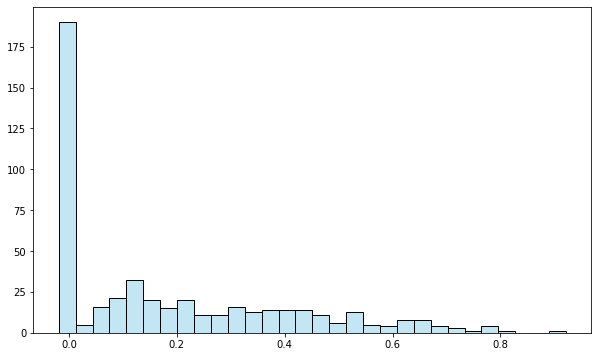

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert the 'coherence_score' columns to a 1D numpy array to avoid multi-dimensional indexing issues
coherence_scores_original = np.array(df_original['coherence_score'])
coherence_scores_fake = np.array(df_fake_articles['coherence_score'])

print(coherence_scores_original.shape)
print(coherence_scores_fake.shape)


# Check if the arrays are valid one-dimensional
print(coherence_scores_original.shape)  # Should output (n,) where n is the number of rows
print(coherence_scores_fake.shape)  # Should output (n,)

# Now proceed with plotting
plt.figure(figsize=(10, 6))

# First dataset (original data)
sns.histplot(coherence_scores_original, bins=30, kde=True, color='skyblue', label='Original Data')

# Second dataset (fake articles)
sns.histplot(coherence_scores_fake, bins=30, kde=True, color='orange', label='Fake Articles')

# Adding titles and labels
plt.title('Distribution of Article Coherence Scores')
plt.xlabel('Coherence Score')
plt.ylabel('Number of Articles')

# Adding a legend to differentiate between datasets
plt.legend()

# Show plot
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure both original and changed datasets have the same length
if len(df_original) != len(df_fake_articles):
    raise ValueError("Original and fake article datasets must have the same length for comparison.")

# Subtract coherence scores of original and changed articles
coherence_difference = df_original['coherence_score'] - df_fake_articles['coherence_score']

# Convert the differences to a numpy array (optional, depending on your preference)
coherence_difference = np.array(coherence_difference)

# Plotting the histogram of differences
plt.figure(figsize=(20, 12))

# Plot the difference in coherence scores
sns.histplot(coherence_difference, bins=50, kde=True, color='purple', label='Difference (Original - Changed)')

# Adding titles and labels
plt.title('Distribution of Differences in Article Coherence Scores (Original - Changed)')
plt.xlabel('Difference in Coherence Score')
plt.ylabel('Number of Articles')

# Adding a legend
plt.legend()

# Show plot
plt.show()



In [ ]:
print(coherence_scores_original.mean())
print(coherence_scores_fake.mean())

0.18797323192359963
0.18797323192359963


(100,)
(100,)


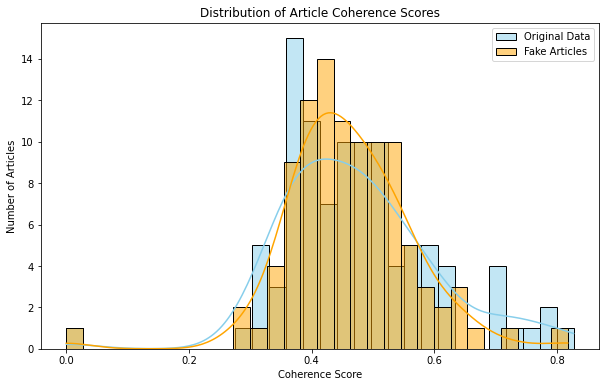

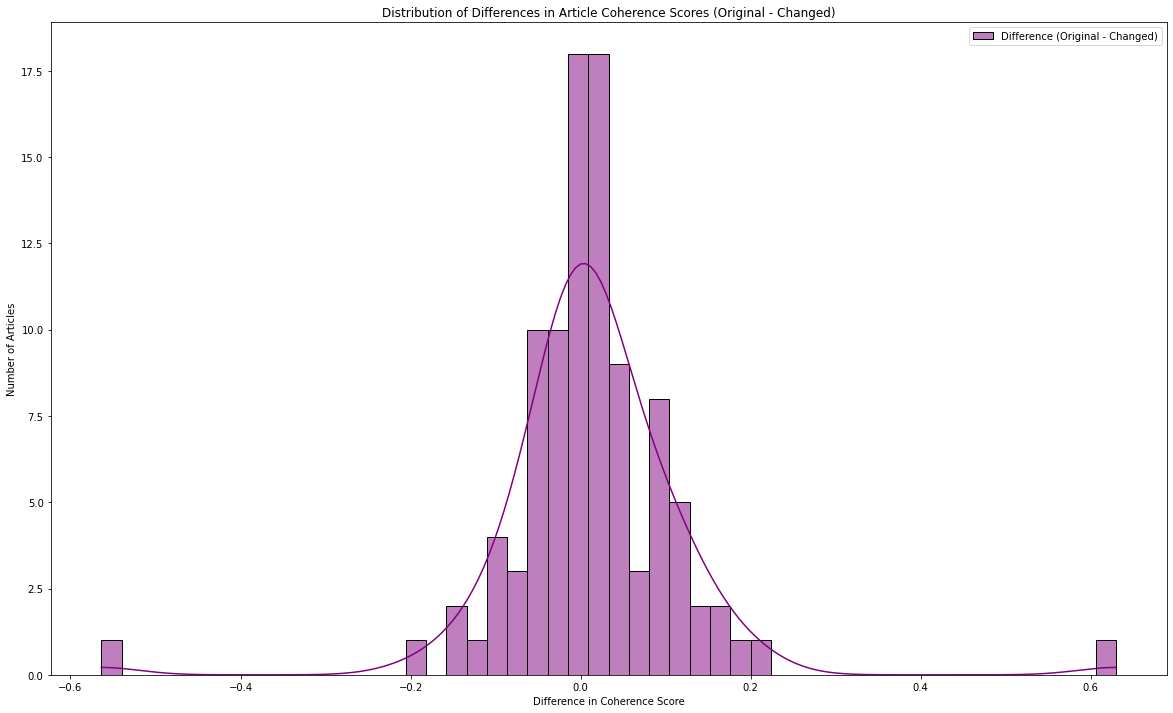

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert the 'coherence_score' columns to a 1D numpy array to avoid multi-dimensional indexing issues
coherence_scores_original = np.array(df_original['coherence_score'])
coherence_scores_fake = np.array(df_fake_articles['coherence_score'])

# Check if the arrays are valid one-dimensional
print(coherence_scores_original.shape)  # Should output (n,) where n is the number of rows
print(coherence_scores_fake.shape)  # Should output (n,)

# Now proceed with plotting
plt.figure(figsize=(10, 6))

# First dataset (original data)
sns.histplot(coherence_scores_original, bins=30, kde=True, color='skyblue', label='Original Data')

# Second dataset (fake articles)
sns.histplot(coherence_scores_fake, bins=30, kde=True, color='orange', label='Fake Articles')

# Adding titles and labels
plt.title('Distribution of Article Coherence Scores')
plt.xlabel('Coherence Score')
plt.ylabel('Number of Articles')

# Adding a legend to differentiate between datasets
plt.legend()

# Show plot
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure both original and changed datasets have the same length
if len(df_original) != len(df_fake_articles):
    raise ValueError("Original and fake article datasets must have the same length for comparison.")

# Subtract coherence scores of original and changed articles
coherence_difference = df_original['coherence_score'] - df_fake_articles['coherence_score']

# Convert the differences to a numpy array (optional, depending on your preference)
coherence_difference = np.array(coherence_difference)

# Plotting the histogram of differences
plt.figure(figsize=(20, 12))

# Plot the difference in coherence scores
sns.histplot(coherence_difference, bins=50, kde=True, color='purple', label='Difference (Original - Changed)')

# Adding titles and labels
plt.title('Distribution of Differences in Article Coherence Scores (Original - Changed)')
plt.xlabel('Difference in Coherence Score')
plt.ylabel('Number of Articles')

# Adding a legend
plt.legend()

# Show plot
plt.show()
